In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from math import sqrt

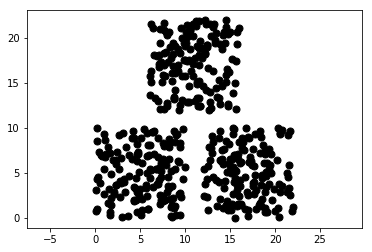

In [2]:
# Créer points en 2D

size = 7
nb = 150
x1 = [rd.random()*10 for i in range(nb)]
y1 = [rd.random()*10 for i in range(nb)]
x2 = [12 + rd.random()*10 for i in range(nb)]
y2 = [rd.random()*10 for i in range(nb)]
x3 = [6 + rd.random()*10 for i in range(nb)]
y3 = [12 + rd.random()*10 for i in range(nb)]

# Création de la liste de coordonnées de la forme [X0, X1, X2, ...] et [Y0, Y1, Y2, ...] (pour les dessins)
X = np.concatenate((x1, x2, x3))
Y = np.concatenate((y1, y2, y3))

# Création de la matrice de points de la forme [[X0, Y0], [X1, Y1], [X2, Y2], ...]
points = []
for ind_point in range(len(X)):
    ptX = X[ind_point]
    ptY = Y[ind_point]
    point = [ptX, ptY]
    points.append(point)
points = np.asarray(points)

# Dessin des points
plt.plot(X, Y, 'ko', markersize = size)
plt.axis('equal')
plt.savefig("output/kmeans/points_bruts.png")

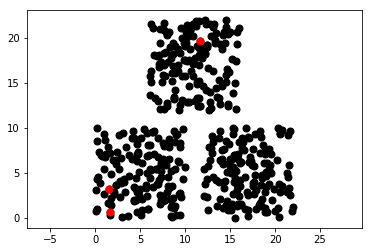

In [3]:
# Centre mobiles

# Définition du nombre de classe
nb_classes = 3

# Dictionnaire pour le dessin des classes
couleurs = {0 : 'yo', 1 : 'go', 2 : 'bo', 3 : 'co', 4 : 'mo', 5 : 'yo'}
couleurs_pred = {0 : 'ys', 1 : 'gs', 2 : 'bs', 3 : 'cs', 4 : 'ms', 5 : 'ys'}

# Création des noyaux initiaux
# coord_X et coord_Y de la forme [X0, X1, X2, ...] et [Y0, Y1, Y2, ...] (pour les dessin)
# bars de la forme [[X0, Y0], [X1, Y1], [X2, Y2], ...]
coord_X = []
coord_Y = []
bars = []
for k in range(nb_classes):
    alea = int(rd.random()*len(points))
    ptX = points[alea][0]
    ptY = points[alea][1]
    point = [ptX, ptY]
    bars.append(point)
    coord_X.append(ptX)
    coord_Y.append(ptY)
bars = np.asarray(bars)    

# Dessin des noyaux initiaux
plt.plot(X, Y, 'ko', markersize = size)
plt.plot(coord_X, coord_Y, 'ro', markersize = size)
plt.axis('equal')
plt.savefig("output/kmeans/noyaux_aleatoires.png")

305.8371361881518


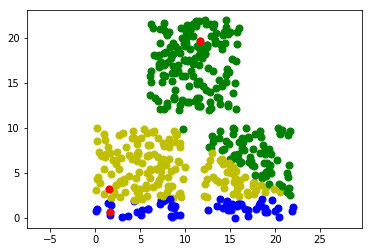

In [4]:
# Création de la liste qui indique les classes des points de la forme [0, 1, 0, 2, 0, 1, ...]
classes = []
for point in points:
    dist = []
    for noyau in bars:
        calcul_dist = sqrt(((noyau[0] - point[0])**2) + ((noyau[1] - point[1])**2))
        dist.append(calcul_dist)
    classes.append(np.argmin(dist))
    
inertie_intra = 0
for k in range(nb_classes):
    inertie_classe = 0
    compte = 0
    for ind_point, point in enumerate(points):
        if classes[ind_point] == k:
            compte += 1
            dist_square = (bars[k][0] - point[0])**2 + (bars[k][1] - point[1])**2
            inertie_classe += dist_square
    inertie_classe /= compte
    inertie_intra += inertie_classe
print(inertie_intra)    

for ind, classe in enumerate(classes):
    pt = points[ind]
    coul = couleurs[classe]
    plt.plot(pt[0], pt[1], coul, markersize = size)
plt.plot(coord_X, coord_Y, 'ro', markersize = size)
plt.axis('equal')
place = 0
plt.savefig("output/kmeans/repartition" + str(place) + ".png")

118.80296498527375


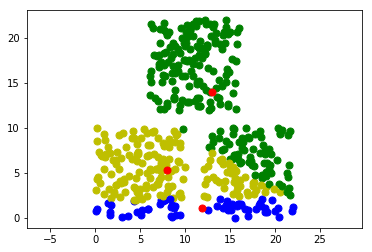

In [5]:
bar_X = []
bar_Y = []
bars = []
for k in range(nb_classes):
    temp_X = 0
    temp_Y = 0
    compte = 0
    for ind_point, point in enumerate(points):
        if classes[ind_point] == k:
            compte += 1
            temp_X += point[0]
            temp_Y += point[1]
    temp_X /= compte
    temp_Y /= compte
    temp = [temp_X, temp_Y]
    bar_X.append(temp_X)
    bar_Y.append(temp_Y)
    bars.append(temp)

inertie_intra = 0
for k in range(nb_classes):
    inertie_classe = 0
    compte = 0
    for ind_point, point in enumerate(points):
        if classes[ind_point] == k:
            compte += 1
            dist_square = (bars[k][0] - point[0])**2 + (bars[k][1] - point[1])**2
            inertie_classe += dist_square
    inertie_classe /= compte
    inertie_intra += inertie_classe
print(inertie_intra)    
    
for ind, classe in enumerate(classes):
    pt = points[ind]
    coul = couleurs[classe]
    plt.plot(pt[0], pt[1], coul, markersize = size)
plt.plot(bar_X, bar_Y, 'ro', markersize = size)
plt.axis('equal')
place = 1
plt.savefig("output/kmeans/repartition" + str(place) + ".png")

46.428504898422574


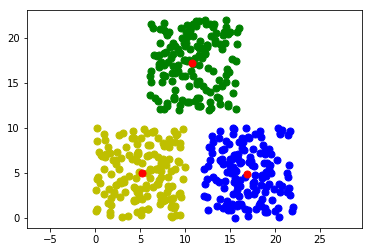

In [9]:
classes = []

for point in points:
    dist = []
    for noyau in bars:
        calcul_dist = sqrt(((noyau[0] - point[0])**2) + ((noyau[1] - point[1])**2))
        dist.append(calcul_dist)
    classes.append(np.argmin(dist))

bar_X = []
bar_Y = []
bars = []
for k in range(nb_classes):
    temp_X = 0
    temp_Y = 0
    compte = 0
    for ind_point, point in enumerate(points):
        if classes[ind_point] == k:
            compte += 1
            temp_X += point[0]
            temp_Y += point[1]
    temp_X /= compte
    temp_Y /= compte
    temp = [temp_X, temp_Y]
    bar_X.append(temp_X)
    bar_Y.append(temp_Y)
    bars.append(temp)

inertie_intra = 0
for k in range(nb_classes):
    inertie_classe = 0
    compte = 0
    for ind_point, point in enumerate(points):
        if classes[ind_point] == k:
            compte += 1
            dist_square = (bars[k][0] - point[0])**2 + (bars[k][1] - point[1])**2
            inertie_classe += dist_square
    inertie_classe /= compte
    inertie_intra += inertie_classe
print(inertie_intra)    
    
for ind, classe in enumerate(classes):
    pt = points[ind]
    coul = couleurs[classe]
    plt.plot(pt[0], pt[1], coul, markersize = size)
plt.plot(bar_X, bar_Y, 'ro', markersize = size)
plt.axis('equal')
place += 1
plt.savefig("output/kmeans/repartition" + str(place) + ".png")

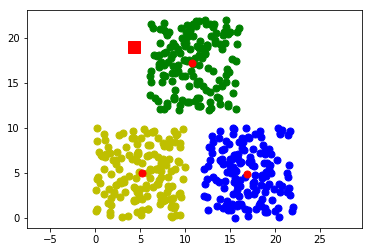

In [13]:
nv_pt = [rd.random()*22, rd.random()*22]
for ind, classe in enumerate(classes):
    pt = points[ind]
    coul = couleurs[classe]
    plt.plot(pt[0], pt[1], coul, markersize = size)
plt.plot(bar_X, bar_Y, 'ro', markersize = size)
plt.plot(nv_pt[0], nv_pt[1], 'rs', markersize = size + 5)
plt.axis('equal')
plt.savefig("output/kmeans/nouv_point.png")

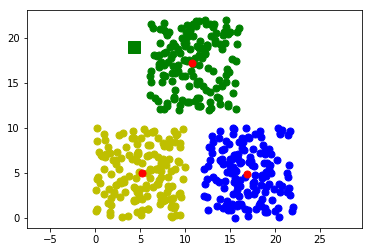

In [14]:
dist = []
for k in range(nb_classes):
    calcul_dist = sqrt((bars[k][0] - nv_pt[0])**2 + (bars[k][1] - nv_pt[1])**2)
    dist.append(calcul_dist)
classe_pred = np.argmin(dist)

for ind, classe in enumerate(classes):
    pt = points[ind]
    coul = couleurs[classe]
    plt.plot(pt[0], pt[1], coul, markersize = size)
plt.plot(bar_X, bar_Y, 'ro', markersize = size)
plt.plot(nv_pt[0], nv_pt[1], couleurs_pred[classe_pred], markersize = size + 5)
plt.axis('equal')
plt.savefig("output/kmeans/nouv_point_classe.png")